# Modeling Analysis of the National Financial Capability Study Survey Report

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn import metrics


In [26]:
finance = pd.read_csv(r"C:\Users\578735\Desktop\5KCapstone\Medical_debt\NFCS.csv",  low_memory=False)

In [27]:
# Drop certain columns not useful for this analysis
finance.drop(columns=['NFCSID', 'C2_2012', 'C3_2012', 'C2_2009', 'C3_2009', 'C11_2012', 'C11_2009'], axis = 1, inplace= True)

In [28]:
finance = finance.rename(columns= { '2000_emergency_money' : 'emergency_money'})

In [29]:
# Drop NaN values
finance.dropna(axis=0, inplace=True)

In [30]:
finance.shape

(81219, 61)

In [32]:
# Check for nulls in dataframe
finance.isnull().sum()[0:40]

year                                    0
state                                   0
division_usa                            0
region_usa                              0
gender                                  0
age_group                               0
gender_age                              0
ethnicity                               0
marital_status                          0
living_situation                        0
child_dependents                        0
annual_income                           0
army_status_indv                        0
army_status_spouse                      0
military_status                         0
indv_employment_status                  0
spouse_employment_status                0
retirement_status                       0
knowledgeable_in_household              0
satisfaction_with_finance               0
finance_risk                            0
spending_vs_income                      0
monthly_burden                          0
emergency_funds                   

In [124]:
#sort correlation values by highest in relation to "too much debt"
finance.corr()['too_much_debt'].sort_values(ascending=False)[0:62]

too_much_debt                           1.000000
emergency_money                         0.578930
other_retirement_plans_2012             0.554499
army_status_indv                        0.534457
withdraw_from_retirement                0.527604
retirement_plans_2012                   0.489497
year                                    0.476660
payday_loan                             0.472873
finance_education                       0.449170
unpaid_pastdue_medical_bills            0.418031
army_status_spouse                      0.270683
appreciation_value                      0.249608
emergency_funds                         0.175396
loan_from_retirement_2012               0.139382
employer_finance_educ                   0.138176
hs_finance_educ                         0.128817
contribute_regularly_retirement_2012    0.124355
other_retirement_plans_2009             0.123448
spending_vs_income                      0.108263
retirement_plans_2009                   0.095544
investments         

In [125]:
finance.corr()['too_much_debt'].abs().drop('year').sort_values(ascending = False)[:20]

too_much_debt                           1.000000
emergency_money                         0.578930
other_retirement_plans_2012             0.554499
army_status_indv                        0.534457
withdraw_from_retirement                0.527604
retirement_plans_2012                   0.489497
payday_loan                             0.472873
finance_education                       0.449170
unpaid_pastdue_medical_bills            0.418031
army_status_spouse                      0.270683
appreciation_value                      0.249608
emergency_funds                         0.175396
monthly_burden                          0.172591
loan_from_retirement_2012               0.139382
employer_finance_educ                   0.138176
satisfaction_with_finance               0.136429
hs_finance_educ                         0.128817
contribute_regularly_retirement_2012    0.124355
mortgage_status                         0.123900
other_retirement_plans_2009             0.123448
Name: too_much_debt,

In [35]:
# list top 5 correlation values 
top5 = list(finance.corr()['too_much_debt'].sort_values()[:6].index)

In [36]:
# list bottom 5 correlation values
bot5 = list(finance.corr()['too_much_debt'].sort_values()[55:].index)

In [37]:
top5

['monthly_burden',
 'satisfaction_with_finance',
 'mortgage_status',
 'retirement_status',
 'stock_question',
 'overdraw_account']

In [38]:
bot5

['retirement_plans_2012',
 'withdraw_from_retirement',
 'army_status_indv',
 'other_retirement_plans_2012',
 'emergency_money',
 'too_much_debt']

In [133]:
top= ['monthly_burden','pay_full_bill_credit_card', 'army_status_indv',
'satisfaction_with_finance','unpaid_pastdue_medical_bills',  'budgeting', 
'mortgage_status', 'emergency_funds', 
'retirement_status',
'overdraw_account', 
'emergency_money', 
'too_much_debt', 'withdraw_from_retirement', 
'finance_education', 'good_at_math']

In [15]:
top2=['emergency_money', 'other_retirement_plans_2012', 'army_status_indv',  'withdraw_from_retirement', 'retirement_plans_2012',  'payday_loan',                         
'finance_education','unpaid_pastdue_medical_bills', 'too_much_debt']

In [16]:
top3=['monthly_burden', 'satisfaction_with_finance', 'budgeting',  'mortgage_status', 'emergency_funds', 'pay_full_bill_credit_card',  'unpaid_pastdue_medical_bills', 'too_much_debt']

In [17]:
top4=['monthly_burden', 'satisfaction_with_finance', 'mortgage_status',  'retirement_status',  'stock_question', 'overdraw_account', 'retirement_plans_2012',
 'withdraw_from_retirement', 'army_status_indv', 'other_retirement_plans_2012', 'emergency_money', 'too_much_debt']

In [18]:
finance.isnull().sum()

year                                    0
state                                   0
division_usa                            0
region_usa                              0
gender                                  0
age_group                               0
gender_age                              0
ethnicity                               0
marital_status                          0
living_situation                        0
child_dependents                        0
annual_income                           0
army_status_indv                        0
army_status_spouse                      0
military_status                         0
indv_employment_status                  0
spouse_employment_status                0
retirement_status                       0
knowledgeable_in_household              0
satisfaction_with_finance               0
finance_risk                            0
spending_vs_income                      0
monthly_burden                          0
emergency_funds                   

In [134]:
df = finance.loc[:,top]

In [135]:
df.isnull().sum()

monthly_burden                  0
pay_full_bill_credit_card       0
army_status_indv                0
satisfaction_with_finance       0
unpaid_pastdue_medical_bills    0
budgeting                       0
mortgage_status                 0
emergency_funds                 0
retirement_status               0
overdraw_account                0
emergency_money                 0
too_much_debt                   0
withdraw_from_retirement        0
finance_education               0
good_at_math                    0
dtype: int64

In [43]:
finance.too_much_debt.dropna(axis=0, inplace=True)

In [44]:
# changing finance type from float to integer
finance["too_much_debt"] = finance["too_much_debt"].astype(int)

In [45]:
# Splitted response variable to binary categories for easier handling in logistic regression
finance.too_much_debt[finance[finance.too_much_debt <=3].index]=0
finance.too_much_debt

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        4
1        0
2        0
3        4
4        0
5        0
6        5
7        5
8        4
9        0
10       6
11       6
12       0
13       0
14       4
15       0
16       0
17       0
18       0
19       0
20       0
21       7
22       0
23       0
24       0
25       4
26       0
27       6
28       0
29       0
        ..
81189    0
81190    0
81191    0
81192    0
81193    0
81194    0
81195    0
81196    0
81197    0
81198    0
81199    0
81200    0
81201    0
81202    0
81203    0
81204    0
81205    0
81206    0
81207    0
81208    0
81209    0
81210    0
81211    0
81212    0
81213    0
81214    0
81215    0
81216    0
81217    0
81218    0
Name: too_much_debt, Length: 81219, dtype: int32

In [46]:
finance.too_much_debt[finance[finance.too_much_debt >=4].index]=1
finance.too_much_debt

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0        1
1        0
2        0
3        1
4        0
5        0
6        1
7        1
8        1
9        0
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
81189    0
81190    0
81191    0
81192    0
81193    0
81194    0
81195    0
81196    0
81197    0
81198    0
81199    0
81200    0
81201    0
81202    0
81203    0
81204    0
81205    0
81206    0
81207    0
81208    0
81209    0
81210    0
81211    0
81212    0
81213    0
81214    0
81215    0
81216    0
81217    0
81218    0
Name: too_much_debt, Length: 81219, dtype: int32

In [136]:
finance.too_much_debt

0        1
1        0
2        0
3        1
4        0
5        0
6        1
7        1
8        1
9        0
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
81189    0
81190    0
81191    0
81192    0
81193    0
81194    0
81195    0
81196    0
81197    0
81198    0
81199    0
81200    0
81201    0
81202    0
81203    0
81204    0
81205    0
81206    0
81207    0
81208    0
81209    0
81210    0
81211    0
81212    0
81213    0
81214    0
81215    0
81216    0
81217    0
81218    0
Name: too_much_debt, Length: 81219, dtype: int32

In [127]:
#sort correlation values by highest in relation to "too much debt"
finance.corr()['too_much_debt'].sort_values(ascending=False)[0:62]

too_much_debt                           1.000000
emergency_money                         0.578930
other_retirement_plans_2012             0.554499
army_status_indv                        0.534457
withdraw_from_retirement                0.527604
retirement_plans_2012                   0.489497
year                                    0.476660
payday_loan                             0.472873
finance_education                       0.449170
unpaid_pastdue_medical_bills            0.418031
army_status_spouse                      0.270683
appreciation_value                      0.249608
emergency_funds                         0.175396
loan_from_retirement_2012               0.139382
employer_finance_educ                   0.138176
hs_finance_educ                         0.128817
contribute_regularly_retirement_2012    0.124355
other_retirement_plans_2009             0.123448
spending_vs_income                      0.108263
retirement_plans_2009                   0.095544
investments         

In [137]:
# Define X and y for Logistic Regression modeling
X = df.loc[:,top].drop('too_much_debt', axis = 1)
y = finance.too_much_debt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
# Note that I use "stratify = y" to deal with out class imbalance.  With stratify, score = 0.8217 and without stratify, score = 0.8212

logreg = LogisticRegression(penalty='l2')

y_pred = logreg.fit(X_train, y_train)

# make class predictions for the testing set
y_pred = logreg.predict(X_test)

logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8085005089142069, 0.805269638020192)

In [138]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.805269638020192
0.7910288044375834


In [139]:
# Coefficients for logistic regression
list(zip(X, logreg.coef_))

[('monthly_burden',
  array([-0.48867185,  0.71902603,  0.74647254, -0.05454228,  0.00426377,
         -0.05853946, -0.16408734,  0.24179765, -0.29241596, -0.30793517,
          0.42781002,  0.56773837,  0.13720707,  0.07255696]))]

In [140]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10789  1950]
 [ 2004  5562]]


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.85      0.85     12739
          1       0.74      0.74      0.74      7566

avg / total       0.80      0.81      0.81     20305



In [29]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.04930631, 0.95069369],
       [0.43178799, 0.56821201],
       [0.14368106, 0.85631894],
       [0.93410851, 0.06589149],
       [0.93393694, 0.06606306],
       [0.95023068, 0.04976932],
       [0.98355268, 0.01644732],
       [0.76472797, 0.23527203],
       [0.8776834 , 0.1223166 ],
       [0.73885661, 0.26114339]])

In [30]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.95069369, 0.56821201, 0.85631894, 0.06589149, 0.06606306,
       0.04976932, 0.01644732, 0.23527203, 0.1223166 , 0.26114339])

In [31]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [32]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

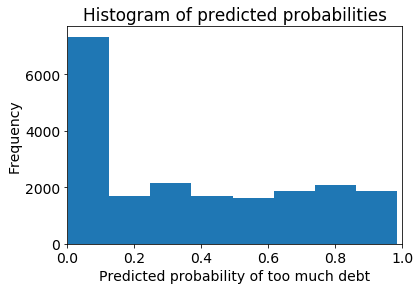

In [33]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of too much debt')
plt.ylabel('Frequency')

In [34]:
# predict debt if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [35]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.95069369, 0.56821201, 0.85631894, 0.06589149, 0.06606306,
       0.04976932, 0.01644732, 0.23527203, 0.1223166 , 0.26114339])

In [122]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[10052  5235]
 [  194  8885]]


In [37]:
# sensitivity has increased (used to be 0.82)
print(6924 / float(6924 + 642))

0.9151467089611419


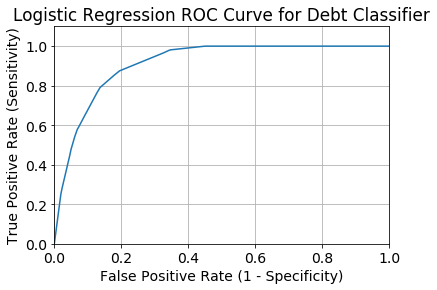

In [123]:
#first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('Logistic Regression ROC Curve for Debt Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
# first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8825476036433458


In [40]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [41]:
evaluate_threshold(0.5)

Sensitivity: 0.7223103357123976
Specificity: 0.8510087133997959


In [42]:
evaluate_threshold(0.3)

Sensitivity: 0.8966428760243194
Specificity: 0.7104953293037131


In [43]:
# Logistic Regression Cross Validation
logreg = LogisticRegression()
logregCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty='l2', cv =3, verbose = 3)
logregCV.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight=None, cv=3,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=3)

In [44]:
# make class predictions for the testing set
y_pred_class = logregCV.predict(X_test)

logregCV.score(X_train, y_train), logregCV.score(X_test, y_test)

(0.8038381981153758, 0.8030534351145038)

In [45]:
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8030534351145038
0.7866058534180941


In [46]:
# pd.DataFrame(data = {
#     "class_lables":logregCV.classes_,
#     "year": logregCV.coef_[:,0]})

In [47]:
finance.shape

(81219, 61)

In [142]:
# DECISION TREE MODEL
X = finance.drop('too_much_debt', axis = 1)
y = finance.too_much_debt.reshape(81219,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
print(X.shape)
print(y.shape)

(81219, 60)
(81219, 1)


In [144]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', min_samples_split=2, min_samples_leaf=1)

tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.8243892142894834, 0.8243864401214808)

In [145]:
# make class predictions for the testing set
y_pred= tree.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))


0.8243864401214808


In [146]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# export_graphviz(tree, out_file='tree.dot',  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
# # export_graphviz(tree, out_file='./assets/tree_titanic.dot')



from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def Plot_Tree(model):
    dot_data = StringIO() 
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=X_train.columns)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return display(Image(graph.create_png()))


In [147]:
# Plot_Tree(Image)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.81      0.85     15287
          1       0.72      0.85      0.78      9079

avg / total       0.84      0.82      0.83     24366



In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[12325  2962]
 [ 1353  7726]]


In [89]:
# print the first 10 predicted probabilities of class membership
tree.predict_proba(X_test)[0:10, :]

array([[0.34562291, 0.65437709],
       [0.74146102, 0.25853898],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.74146102, 0.25853898],
       [0.34562291, 0.65437709],
       [0.74146102, 0.25853898],
       [0.34562291, 0.65437709],
       [0.74146102, 0.25853898],
       [0.74146102, 0.25853898]])

In [90]:
# print the first 10 predicted probabilities for class 1
tree.predict_proba(X_test)[0:10, 1]

array([0.65437709, 0.25853898, 0.        , 0.        , 0.25853898,
       0.65437709, 0.25853898, 0.65437709, 0.25853898, 0.25853898])

In [91]:
y_pred_prob = tree.predict_proba(X_test)[:, 1]

In [92]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

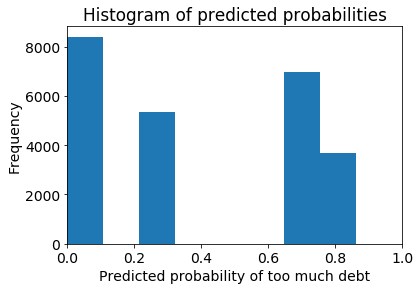

In [93]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of too much debt')
plt.ylabel('Frequency')

In [94]:
# predict debt if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [95]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.65437709, 0.25853898, 0.        , 0.        , 0.25853898,
       0.65437709, 0.25853898, 0.65437709, 0.25853898, 0.25853898])

In [96]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[12379  2908]
 [ 1344  7735]]


In [97]:
# sensitivity has increased (used to be 0.84)
print(6986 / float(6986 + 580))

0.9233412635474492


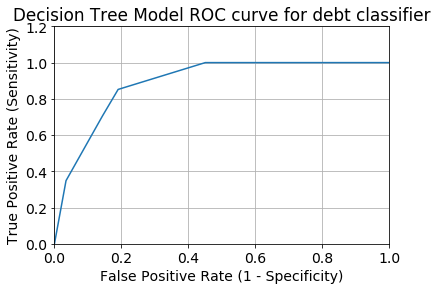

In [102]:
#first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.title('Decision Tree Model ROC curve for debt classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [75]:
# first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8888294172332458


In [76]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [77]:
evaluate_threshold(0.5)

evaluate_threshold(0.3)

Sensitivity: 0.8509747769578148
Specificity: 0.806240596585334
Sensitivity: 0.8509747769578148
Specificity: 0.806240596585334


In [58]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='./Medical_debt.dot')

# At the command line, run this to convert to PNG:
#   dot -Tpng Medical_debt.dot -o Medical_debt.png


In [70]:
features_summary = pd.DataFrame({
    "Feature_Names": X.columns,
    "Feature_Importance" :tree.feature_importances_
}, columns = ['Feature_Names','Feature_Importance'])

In [71]:
features_summary.sort_values(by = 'Feature_Importance', ascending = False).head(10)

,Feature_Names,Feature_Importance
0,year,0.734324
22,monthly_burden,0.163488
43,pay_full_bill_credit_card,0.102187
31,contribute_regularly_retirement_2012,0.000000
33,retirement_plans_2009,0.000000
34,other_retirement_plans_2009,0.000000
35,contribute_regularly_retirement_2009,0.000000
36,loan_from_retirement_2009,0.000000
37,investments,0.000000
38,withdraw_from_retirement,0.000000


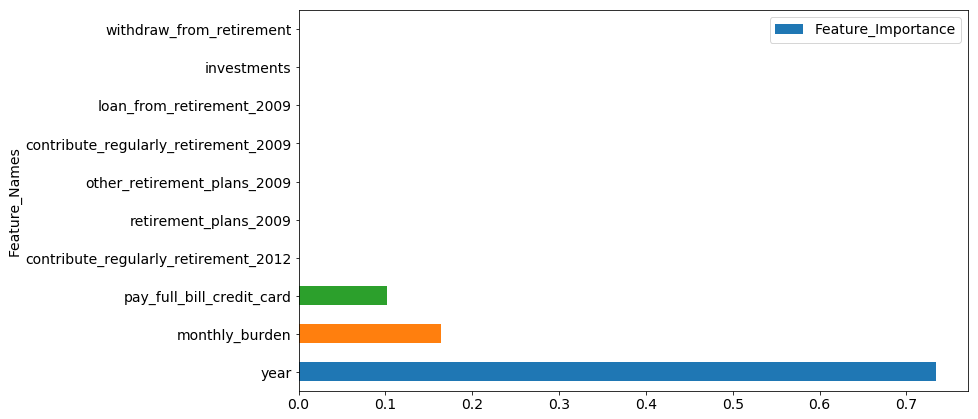

In [73]:
top_15_tree_features = features_summary.sort_values(by = 'Feature_Importance', ascending = False).head(10).copy()

top_15_tree_features.plot(kind='barh', x = 'Feature_Names', y = 'Feature_Importance', figsize = (12,7))

In [149]:
from sklearn.ensemble import RandomForestRegressor

X = finance.drop('too_much_debt', axis = 1)
y = finance.too_much_debt.reshape(81219,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

rf = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=4)

rf.fit(X_train, y_train)

y_pred= rf.predict(X_test)

rf.score(X_train, y_train), rf.score(X_test, y_test)

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


(0.8835751061348812, 0.4581185178055876)

In [150]:
print(metrics.roc_auc_score(y_test, y_pred))

0.8927120916835674


In [76]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [151]:
temp = finance.drop('too_much_debt', axis = 1)
y_temp = finance.too_much_debt.reshape(81219,1)

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [78]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(X_train)
# cpts = pd.DataFrame(pca.transform(X_train))
# x_axis = np.arange(1, pca.n_components_+1)
# pca_scaled = PCA()
# pca_scaled.fit(X_train)
# cpts_scaled = pd.DataFrame(pca.transform(X_train))

In [79]:
pca = PCA(n_components=30)
pca.fit(temp)
pca = pca.transform(temp)
pca.shape

(81219, 30)

In [80]:
# # make class predictions for the testing set
# y_pred= pca.predict(X_test)
# print(metrics.accuracy_score(y_test, y_pred))

In [81]:
# logregCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty='l2', cv =3, verbose = 3)

# logregCV.fit(X_pca, y_temp)

In [82]:
# logregCV.get_params

In [83]:
# logregCV.score(X_pca, y_temp)

In [84]:
# It appears that PCA did not help as much as Decision Tree.
# other things to try: Using with and without scaler (MinMax, StandardScaler), try with and without PCA (salce before PCA).
# Also Try RandomForestClassifier, its in the emsemble.  Try n_estimators = 5,10,25,50,100,200.

In [152]:
#GRIDSEARCHCV MODEL defines a list of parameters that will be searched using k-fold cross validation. 
from sklearn.model_selection import GridSearchCV

In [153]:
model = DecisionTreeClassifier()

model_params = {
    "max_depth": [3, 5, 10],
    "criterion": ['gini','entropy'],
}

gs = GridSearchCV(model, model_params, cv =3, n_jobs = 2)
gs.fit (X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
# make class predictions for the testing set
y_pred= gs.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8331281293605844


In [155]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8361388141346983, 0.8331281293605844)

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87     15287
          1       0.78      0.77      0.78      9079

avg / total       0.83      0.83      0.83     24366



In [157]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13272  2015]
 [ 2051  7028]]


In [158]:
print(metrics.roc_auc_score(y_test, y_pred_class))

0.4986618553251053


In [159]:
# print the first 10 predicted probabilities of class membership
gs.predict_proba(X_test)[0:10, :]


array([[1.        , 0.        ],
       [0.35714286, 0.64285714],
       [1.        , 0.        ],
       [0.34693878, 0.65306122],
       [0.19430693, 0.80569307],
       [1.        , 0.        ],
       [0.2234763 , 0.7765237 ],
       [1.        , 0.        ],
       [0.35714286, 0.64285714],
       [1.        , 0.        ]])

In [111]:
# print the first 10 predicted probabilities for class 1
gs.predict_proba(X_test)[0:10, 1]

array([0.80771866, 0.08591153, 0.        , 0.        , 0.30317274,
       0.63682277, 0.30522332, 0.46148256, 0.30522332, 0.30522332])

In [112]:
# store the predicted probabilities for class 1
y_pred_prob = gs.predict_proba(X_test)[:, 1]

In [113]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

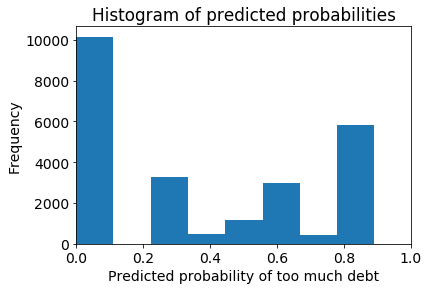

In [114]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of too much debt')
plt.ylabel('Frequency')

In [115]:
# predict debt if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [116]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.80771866, 0.08591153, 0.        , 0.        , 0.30317274,
       0.63682277, 0.30522332, 0.46148256, 0.30522332, 0.30522332])

In [117]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[10052  5235]
 [  194  8885]]


In [118]:
# sensitivity has increased (used to be 0.82)
print(7004 / float(7004 + 562))

0.9257203277821835


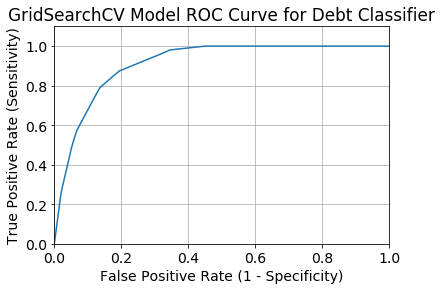

In [121]:
#first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('GridSearchCV Model ROC Curve for Debt Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [102]:
# first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9111889853001864


In [103]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [104]:
evaluate_threshold(0.5)

evaluate_threshold(0.3)

Sensitivity: 0.7924881594889305
Specificity: 0.8619088114083862
Sensitivity: 0.8832470536402688
Specificity: 0.7878589651337737


In [105]:
# Standard Scalar
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= pd.DataFrame(X_test)

In [79]:
# Logistical Regression modeling

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, model_selection, metrics
lr = LogisticRegression()


# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.loc[:,top].drop('too_much_debt', axis = 1)
y = finance.too_much_debt

# Preprocessing and Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)


# TRAIN model
lr.fit(X_train, y_train)


# Predict or test model--only predicting on X_test
y_pred = lr.predict(X_test)

# Metrics
print('The accuracy is:', lr.score(X_test, y_test)) # score the trained model compared to the test data (X_test, y_test)

The accuracy is: 0.803201181974883


In [80]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.5f" % (results.mean()))

#The average accuracy remains very close to the Logistic Regression model accuracy (0.8202); hence, we can conclude that our model generalizes well.

10-fold cross validation average accuracy: 0.80280


In [81]:
# Confusion Matrix
# Get probability predictions.
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train) # C is a regularization constant and scales them appropriately
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

#The result is telling us that we have 10904+5753  = 16,657 correct predictions and 1825+1823 = 3648 incorrect predictions.

array([[10871,  1858],
       [ 2141,  5435]], dtype=int64)

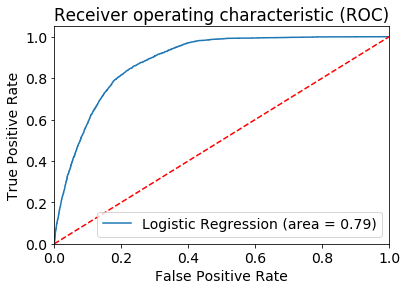

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#The receiver operating characteristic (ROC) curve is used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier
#a good classifier stays as far away from that line as possible (toward the top-left corner).

In [ ]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt

# plt.figure(0).clf()

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
# auc = metrics.roc_auc_score(label, pred)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
# auc = metrics.roc_auc_score(label, pred)
# plt.plot(fpr,tpr,label="data 2, auc="+str(auc))

# plt.legend(loc=0)

Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Interpretation: Of the entire test set, 82% of the "too much debt" were people who actually had too much debt. 
#Of the entire test set, 82% of the customer’s preferred term deposits that were promoted.
# F1 score is the weighted harmonic mean of precision and recall, where F1 score reaches its best value at 1 and worst score at 0. 
# there are 20,305 occurrences in each class in y_test. 

             precision    recall  f1-score   support

          0       0.84      0.85      0.84     12729
          1       0.75      0.72      0.73      7576

avg / total       0.80      0.80      0.80     20305



In [114]:
#Ridge Regression
# Assign X as a DataFrame of features and y as a Series of the outcome variable

X = df.loc[:,top].drop('too_much_debt', axis = 1)
y = finance.too_much_debt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [115]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge
from sklearn import linear_model, model_selection, metrics

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0.00001, normalize=True) # alpha=0 does not do anything, just linear regression

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
print(ridgereg.score(X_train, y_train))

0.4133619128418722


In [117]:
# Coefficients for a non-regularized logistic regression
list(zip(X, ridgereg.coef_))

[('monthly_burden', -0.05515917174356948),
 ('pay_full_bill_credit_card', 0.08776424733351604),
 ('satisfaction_with_finance', -0.006660612101493309),
 ('unpaid_pastdue_medical_bills', -0.004036678032420445),
 ('budgeting', -0.00390838413153921),
 ('mortgage_status', -0.02215004543680177),
 ('emergency_funds', 0.02511215469185286),
 ('retirement_status', -0.049634109333154285),
 ('overdraw_account', -0.03402101944980272),
 ('emergency_money', 0.11058033941686564),
 ('withdraw_from_retirement', 0.13734610890806473),
 ('finance_education', 0.030123396612449893),
 ('good_at_math', 0.006077835818957787)]

In [118]:
# Try a different alpha value.
ridgereg = Ridge(alpha=0.0001, normalize=True) # the greater the alpha, the worse the model does. 
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# Predict with fitted model.
print(ridgereg.score(X_train, y_train))

0.41336190934626504


In [119]:
# Examine the coefficients. combine them together and put them into a list 
list(zip(X, ridgereg.coef_))

[('monthly_burden', -0.05515727418704465),
 ('pay_full_bill_credit_card', 0.0877532024658005),
 ('satisfaction_with_finance', -0.006661761895980863),
 ('unpaid_pastdue_medical_bills', -0.00399764137343763),
 ('budgeting', -0.003907972826798072),
 ('mortgage_status', -0.022151416597605614),
 ('emergency_funds', 0.02512213490850797),
 ('retirement_status', -0.049637314418216616),
 ('overdraw_account', -0.03401994873499863),
 ('emergency_money', 0.11056904042202034),
 ('withdraw_from_retirement', 0.137308105636736),
 ('finance_education', 0.030128280413885555),
 ('good_at_math', 0.006076434160224288)]

Automatically created module for IPython interactive environment


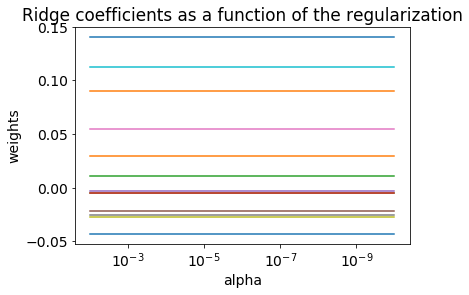

In [120]:
# Plot Ridge coefficients as a function of the regularization
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = df.loc[:,top].drop('too_much_debt', axis = 1).copy()
y = finance.too_much_debt

# Compute paths

n_alphas = 100
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [121]:
#Lasso Regression

X = df.loc[:,top].drop('too_much_debt', axis = 1)
y = finance.too_much_debt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [122]:
from sklearn.linear_model import Lasso

# Instantiate the model. Alpha of zero has no regularization strength, essentially a basic linear regression.
Lasso= Lasso(alpha=0, normalize=True) # alpha=0 does not do anything, just linear regression

# Fit the model.
Lasso.fit(X_train, y_train)

# Predict with fitted model.
# y_pred = Lasso.predict(X_test)
# Predict with fitted model.
print(Lasso.score(X_train, y_train))

C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


0.41534388338038963


C:\Users\578735\AppData\Local\Continuum\anaconda3\New_folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [123]:
# Coefficients for a non-regularized logistic regression
list(zip(X, Lasso.coef_))

[('monthly_burden', -0.05495185802456357),
 ('pay_full_bill_credit_card', 0.08741450393203197),
 ('satisfaction_with_finance', -0.007415993309035262),
 ('unpaid_pastdue_medical_bills', 0.000754937435944879),
 ('budgeting', -0.006325349923601231),
 ('mortgage_status', -0.0217845092119684),
 ('emergency_funds', 0.02572460185036405),
 ('retirement_status', -0.04872147549140522),
 ('overdraw_account', -0.03295660365150387),
 ('emergency_money', 0.10985723878566737),
 ('withdraw_from_retirement', 0.13664879730568458),
 ('finance_education', 0.029067633397435885),
 ('good_at_math', 0.008260587279874313)]